# Cats vs Dogs Image Classification using Convolutional Neural Networks (CNN)

This notebook demonstrates how to build and train a CNN model to classify images of cats and dogs.

## Setup and Data Preparation

In [1]:
# Set up the Kaggle dataset
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!mkdir -p data
!kaggle datasets download -d tongpython/cat-and-dog -p data/
!unzip data/cat-and-dog.zip -d data/
!rm data/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/training_set/training_set/cats/cat.3704.jpg  
  inflating: data/training_set/training_set/cats/cat.3705.jpg  
  inflating: data/training_set/training_set/cats/cat.3706.jpg  
  inflating: data/training_set/training_set/cats/cat.3707.jpg  
  inflating: data/training_set/training_set/cats/cat.3708.jpg  
  inflating: data/training_set/training_set/cats/cat.3709.jpg  
  inflating: data/training_set/training_set/cats/cat.371.jpg  
  inflating: data/training_set/training_set/cats/cat.3710.jpg  
  inflating: data/training_set/training_set/cats/cat.3711.jpg  
  inflating: data/training_set/training_set/cats/cat.3712.jpg  
  inflating: data/training_set/training_set/cats/cat.3713.jpg  
  inflating: data/training_set/training_set/cats/cat.3714.jpg  
  inflating: data/training_set/training_set/cats/cat.3715.jpg  
  inflating: data/training_set/training_set/cats/cat.3716.jpg  
  inflating: data/training_set/training_set/cats/cat.3

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [3]:
def process(image, label):
    """Normalize the image data"""
    image = tf.cast(image/255, tf.float32)
    return image, label

# Load and preprocess the training data
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/data/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
train_data = train_data.map(process)

# Load and preprocess the validation data
validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/data/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_data = validation_data.map(process)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


## Initial CNN Model

In [4]:
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile the initial model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the initial model
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - accuracy: 0.5081 - loss: 0.7219 - val_accuracy: 0.5091 - val_loss: 0.6880
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.5650 - loss: 0.6772 - val_accuracy: 0.6540 - val_loss: 0.6265
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6815 - loss: 0.6091 - val_accuracy: 0.7019 - val_loss: 0.5797
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.7496 - loss: 0.5127 - val_accuracy: 0.7449 - val_loss: 0.5596
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8050 - loss: 0.4117 - val_accuracy: 0.7321 - val_loss: 0.6469
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8614 - loss: 0.3091 - val_accuracy: 0.7479 - val_loss: 0.7366
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9164 - loss: 0.1981 - val_accuracy: 0.7355 - val_loss: 0.9968
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9544 - loss: 0.1220 - val_accurac

## Visualize Training Results

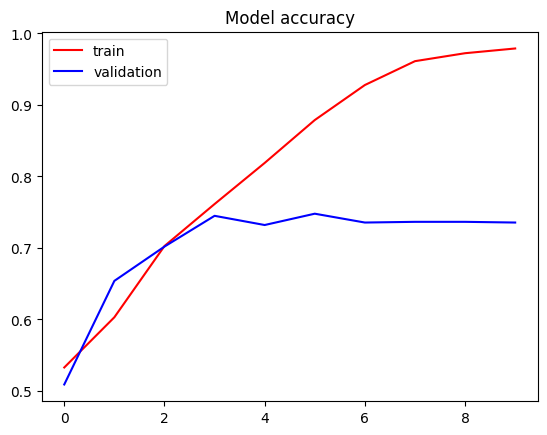

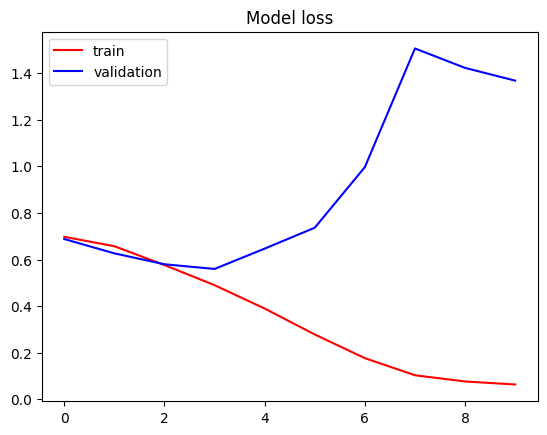

In [5]:
def plot_history(history, metric):
    plt.plot(history.history[metric], color='red', label='train')
    plt.plot(history.history[f'val_{metric}'], color='blue', label='validation')
    plt.legend()
    plt.title(f'Model {metric}')
    plt.show()

plot_history(history, 'accuracy')
plot_history(history, 'loss')

## Improved Model with Regularization

In [6]:
def create_improved_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile the improved model
model_2 = create_improved_model()
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the improved model
history_2 = model_2.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - accuracy: 0.5585 - loss: 3.2684 - val_accuracy: 0.5002 - val_loss: 1.6604
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.5580 - loss: 0.7250 - val_accuracy: 0.5304 - val_loss: 1.0865
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.5905 - loss: 0.6616 - val_accuracy: 0.5877 - val_loss: 0.6504
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6101 - loss: 0.6424 - val_accuracy: 0.6174 - val_loss: 0.6729
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6268 - loss: 0.6428 - val_accuracy: 0.6520 - val_loss: 0.6283
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6703 - loss: 0.5919 - val_accuracy: 0.6505 - val_loss: 0.6819
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7166 - loss: 0.5358 - val_accuracy: 0.6565 - val_loss: 0.7380
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.7450 - loss: 0.5136 - 

## Visualize Improved Model Results

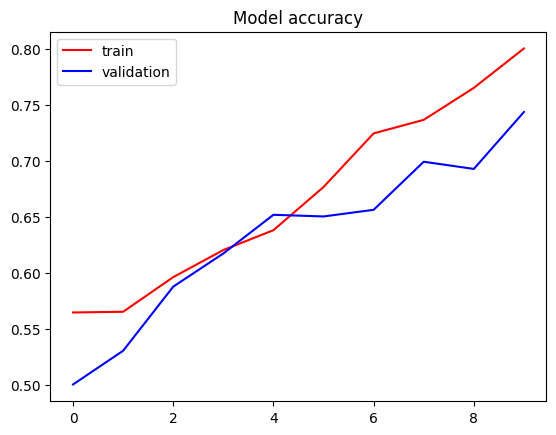

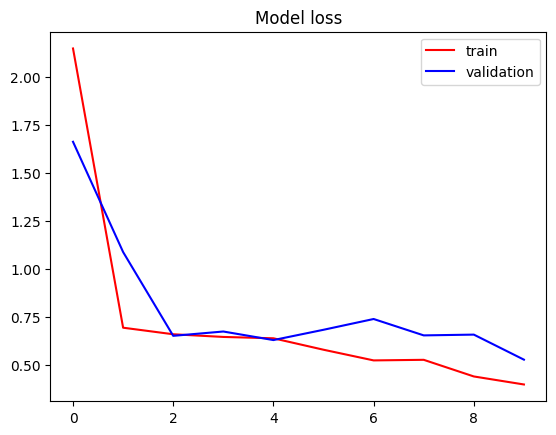

In [7]:
plot_history(history_2, 'accuracy')
plot_history(history_2, 'loss')

## Notes on Reducing Overfitting

1. Add more data
2. Data Augmentation
3. L1/L2 Regularization
4. Dropout (implemented)
5. Batch Normalization (implemented)
6. Reduce model complexity